In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = sns.load_dataset("mpg")

X_train, y_train = df[~df["horsepower"].isna()][["displacement", "acceleration"]], df[~df["horsepower"].isna()]["horsepower"]
X_pred = df[df["horsepower"].isna()][["displacement", "acceleration"]]

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_pred)
y_pred = np.round(y_pred)
df.loc[X_pred.index, "horsepower"] = y_pred
df = pd.get_dummies(df.drop("name", axis = 1), columns = ["origin"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [3]:
X, y = df.drop(["mpg"], axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [4]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [5]:
from evolutionary_algos import EvoMLPRegressor

In [6]:
regressor = EvoMLPRegressor(n = 24, hidden_layers = [8], activation = "relu", random_state = 42, lr_target = 0.02, lr_final_decay = 0.03)
regressor.fit(scaled_X_train, y_train, epochs = 10000, validation_data = (scaled_X_val, y_val), verbose = 1)

Epoch 0 - loss: 11.47729651839145 - val_loss: 10.797554693616892
Epoch 1 - loss: 9.650244530343594 - val_loss: 9.363033717148546
Epoch 2 - loss: 9.207527364413783 - val_loss: 9.197177534405714
Epoch 3 - loss: 8.084616554140132 - val_loss: 9.734644144265024
Epoch 4 - loss: 6.305441418301813 - val_loss: 7.456975627026308
Epoch 7 - loss: 5.932342757460538 - val_loss: 5.585084707810168
Epoch 8 - loss: 5.85655696656713 - val_loss: 6.780661323690616
Epoch 12 - loss: 5.611324589434035 - val_loss: 5.130731185559079
Epoch 14 - loss: 5.562353665810678 - val_loss: 5.986210784743693
Epoch 19 - loss: 5.531463831026204 - val_loss: 5.350248957892359
Epoch 20 - loss: 4.481168999406992 - val_loss: 4.099212342625239
Epoch 28 - loss: 4.367844381101649 - val_loss: 4.711231555082381
Epoch 34 - loss: 4.22281663849945 - val_loss: 4.046843643120317
Epoch 40 - loss: 3.8188455118952254 - val_loss: 3.855389954521052
Epoch 41 - loss: 3.7134910566832846 - val_loss: 3.21303272263294
Epoch 49 - loss: 3.4479507926766

Loss on test data: 1.5177418357046766


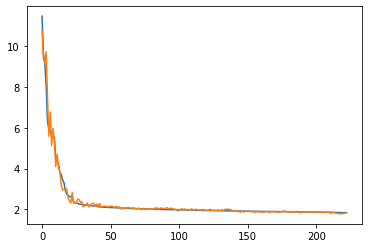

In [7]:
y_pred = regressor.predict(scaled_X_test)
print(f"Loss on test data: {mean_absolute_error(y_test, y_pred)}")

fig, ax = plt.subplots(1, 1)

ax.plot(regressor.training_loss_history)
ax.plot(regressor.validation_loss_history)

plt.show()